## <font size=5> <strong>PHISHING URL WEBSITE DETECTION USING ML
 

## I. Importing essential libraries

In [1]:
## Import different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import confusion_matrix



from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



import pickle
from sklearn.utils import resample


import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset 

In [2]:
## Reading the data
data = pd.read_csv('phishing.csv')

In [3]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(data)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
data.shape

(2456, 31)

#### Printing out a few columns

In [6]:
data.head(50)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0
5,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,-1,1,0
6,0,-1,0,0,0,-1,-1,1,-1,1,...,1,1,1,1,1,1,0,0,1,0
7,0,-1,0,0,0,1,1,1,-1,0,...,0,0,1,0,-1,-1,0,-1,1,0
8,0,0,0,0,0,0,-1,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,-1,0,1,1,1


In [7]:
data.sample(15)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
938,1,1,1,0,1,-1,0,-1,-1,1,...,1,1,-1,1,1,-1,0,1,1,1
715,1,-1,1,0,1,0,-1,-1,1,1,...,1,1,1,1,1,-1,0,1,1,1
1608,0,-1,0,0,0,-1,1,1,0,0,...,0,0,1,1,0,-1,1,0,0,1
1896,0,-1,0,0,0,0,1,-1,1,0,...,0,0,0,1,1,-1,0,1,0,0
1584,0,-1,0,0,0,0,1,1,1,1,...,1,1,1,0,1,-1,0,0,1,0
2366,0,-1,0,0,0,1,-1,1,0,1,...,1,1,1,1,1,-1,0,1,1,0
96,0,-1,0,0,0,1,0,1,0,0,...,0,0,-1,0,1,1,0,0,0,0
1841,0,-1,0,0,0,-1,-1,-1,0,0,...,0,0,-1,0,-1,-1,0,0,0,1
1741,0,-1,0,0,0,-1,0,-1,1,1,...,1,1,-1,0,-1,-1,0,0,1,1
2100,0,-1,0,0,0,0,0,0,0,0,...,0,0,1,1,-1,0,0,0,0,1


#### Description

In [8]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

#### columns:

In [10]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [11]:
n = len(data[data['Result'] == 0])
print("The input URL is classified as legitimate (0)",n)

n1 = len(data[data['Result'] == 1])
print("The input URL is classified as phishing (1):",n1)



The input URL is classified as legitimate (0) 1362
The input URL is classified as phishing (1): 1094


#### Analysing the 'target' variable

In [12]:
data["Result"].describe()

count    2456.000000
mean        0.445440
std         0.497115
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Result, dtype: float64

In [13]:
data["Result"].unique()

array([1, 0], dtype=int64)

In [14]:
## Checking the missing values
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [15]:
data.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [16]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [17]:
## Checking the missing values
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## iii Exploratory Data Analysis (EDA)

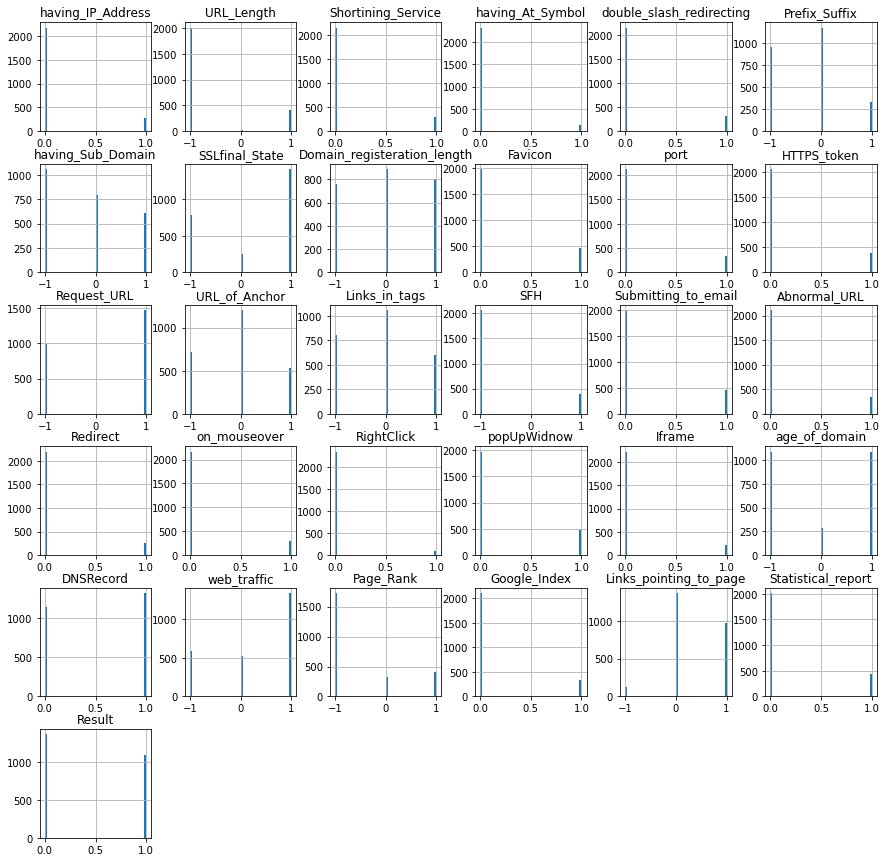

In [18]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

<AxesSubplot:xlabel='Result', ylabel='count'>

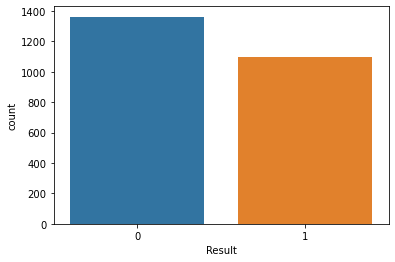

In [19]:
sns.countplot(data['Result'])

## IV. Train Test split

In [20]:
X=data.drop(['Result'],axis=1)
Y=data.Result

In [21]:
! pip install imbalanced-learn

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

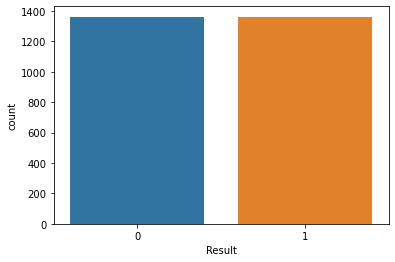

In [22]:
# 42 input

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE


rdsmple=SMOTE()
X_sampled,y_sampled=rdsmple.fit_resample(X,Y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)


X_sampled


sns.countplot(y_sampled)


X_sampled.columns


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

In [24]:
X_train.shape

(2179, 30)

In [25]:
X_test.shape

(545, 30)

In [26]:
y_train.shape

(2179,)

In [27]:
y_test.shape

(545,)

## V. Model Fitting

In [28]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

In [30]:
Y_pred_lr.shape

(545,)

In [31]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 93.39 %


Confusion Matrix is:
 [[248  24]
 [ 12 261]]


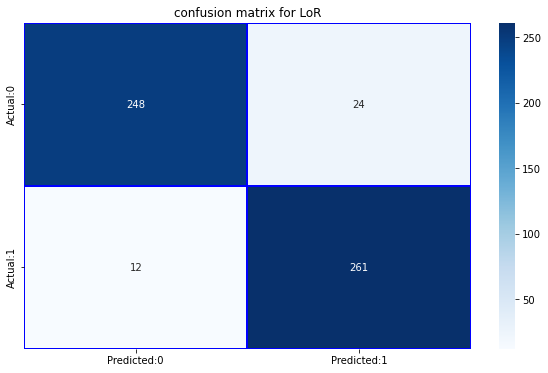

In [32]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_lr) 
print("Confusion Matrix is:\n",cm)

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
plt.title("confusion matrix for LoR")
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

### SVM

In [33]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [34]:
Y_pred_svm.shape

(545,)

In [35]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 95.96 %


Confusion Matrix is:
 [[257  15]
 [  7 266]]


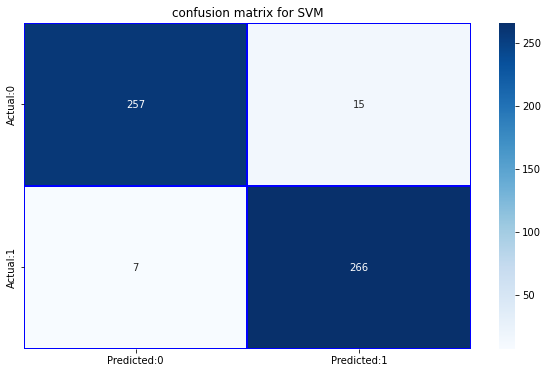

In [36]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_svm) 
print("Confusion Matrix is:\n",cm)

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
plt.title("confusion matrix for SVM")
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

### K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [38]:
Y_pred_knn.shape

(545,)

In [39]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 93.76 %


Confusion Matrix is:
 [[245  27]
 [  7 266]]


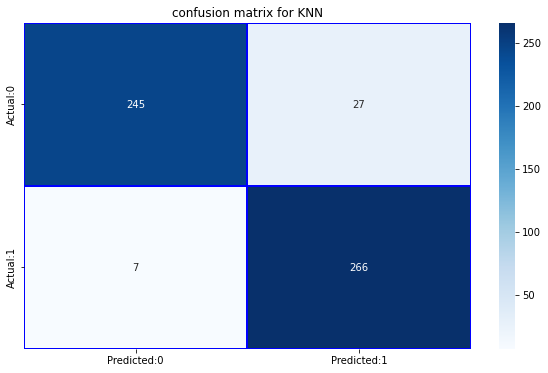

In [40]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_knn) 
print("Confusion Matrix is:\n",cm)

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
plt.title("confusion matrix for KNN")
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier



dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [42]:
print(Y_pred_dt.shape)

(545,)


In [43]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 97.06 %


Confusion Matrix is:
 [[265   7]
 [  9 264]]


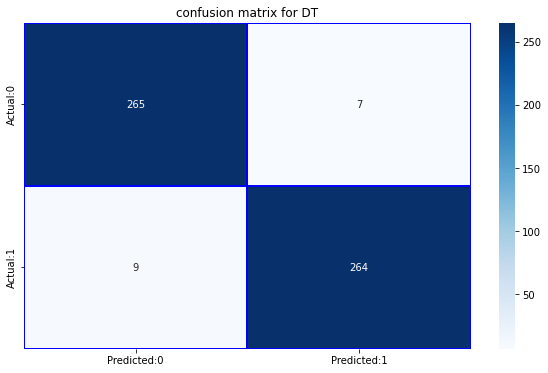

In [44]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_dt) 
print("Confusion Matrix is:\n",cm)

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
plt.title("confusion matrix for DT")
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [46]:
Y_pred_rf.shape

(545,)

Confusion Matrix is:
 [[267   5]
 [  6 267]]


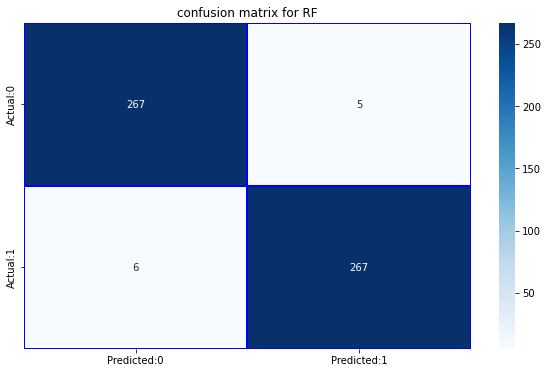

In [47]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_rf) 
print("Confusion Matrix is:\n",cm)

conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
plt.title("confusion matrix for RF")
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

In [48]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 97.98 %


## VI. Output final score

In [49]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf]
algo = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algo)):
    print("The accuracy score for "+algo[i]+" is: "+str(scores[i])+" %")

The accuracy score for Logistic Regression is: 93.39 %
The accuracy score for Support Vector Machine is: 95.96 %
The accuracy score for K-Nearest Neighbors is: 93.76 %
The accuracy score for Decision Tree is: 97.06 %
The accuracy score for Random Forest is: 97.98 %


<AxesSubplot:title={'center':'Comparsion of algorithms'}, xlabel='<------  Algorithms  ------>', ylabel='<------  Accuracy score  ------>'>

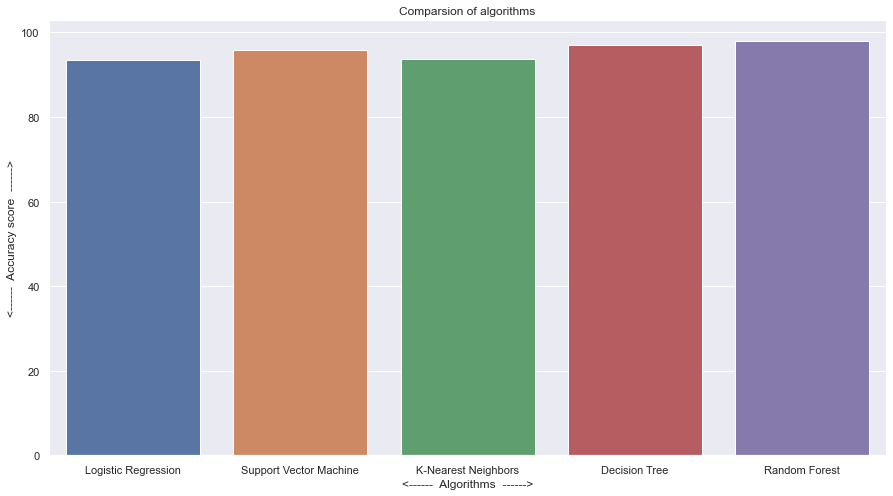

In [50]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("<------  Algorithms  ------>")
plt.ylabel("<------  Accuracy score  ------>")
plt.title("Comparsion of algorithms")

sns.barplot(algo,scores)

### classification report for each algorithm 

In [51]:
l=[Y_pred_lr,Y_pred_svm,Y_pred_knn,Y_pred_dt,Y_pred_rf]
for i in range(len(algo)):
    print("-------------------------------------------------------")
    print(algo[i])
    print("-------------------------------------------------------")
    print("Classification Report is:\n\n",classification_report(y_test,l[i]))
    
    

-------------------------------------------------------
Logistic Regression
-------------------------------------------------------
Classification Report is:

               precision    recall  f1-score   support

           0       0.95      0.91      0.93       272
           1       0.92      0.96      0.94       273

    accuracy                           0.93       545
   macro avg       0.93      0.93      0.93       545
weighted avg       0.93      0.93      0.93       545

-------------------------------------------------------
Support Vector Machine
-------------------------------------------------------
Classification Report is:

               precision    recall  f1-score   support

           0       0.97      0.94      0.96       272
           1       0.95      0.97      0.96       273

    accuracy                           0.96       545
   macro avg       0.96      0.96      0.96       545
weighted avg       0.96      0.96      0.96       545

-----------------------

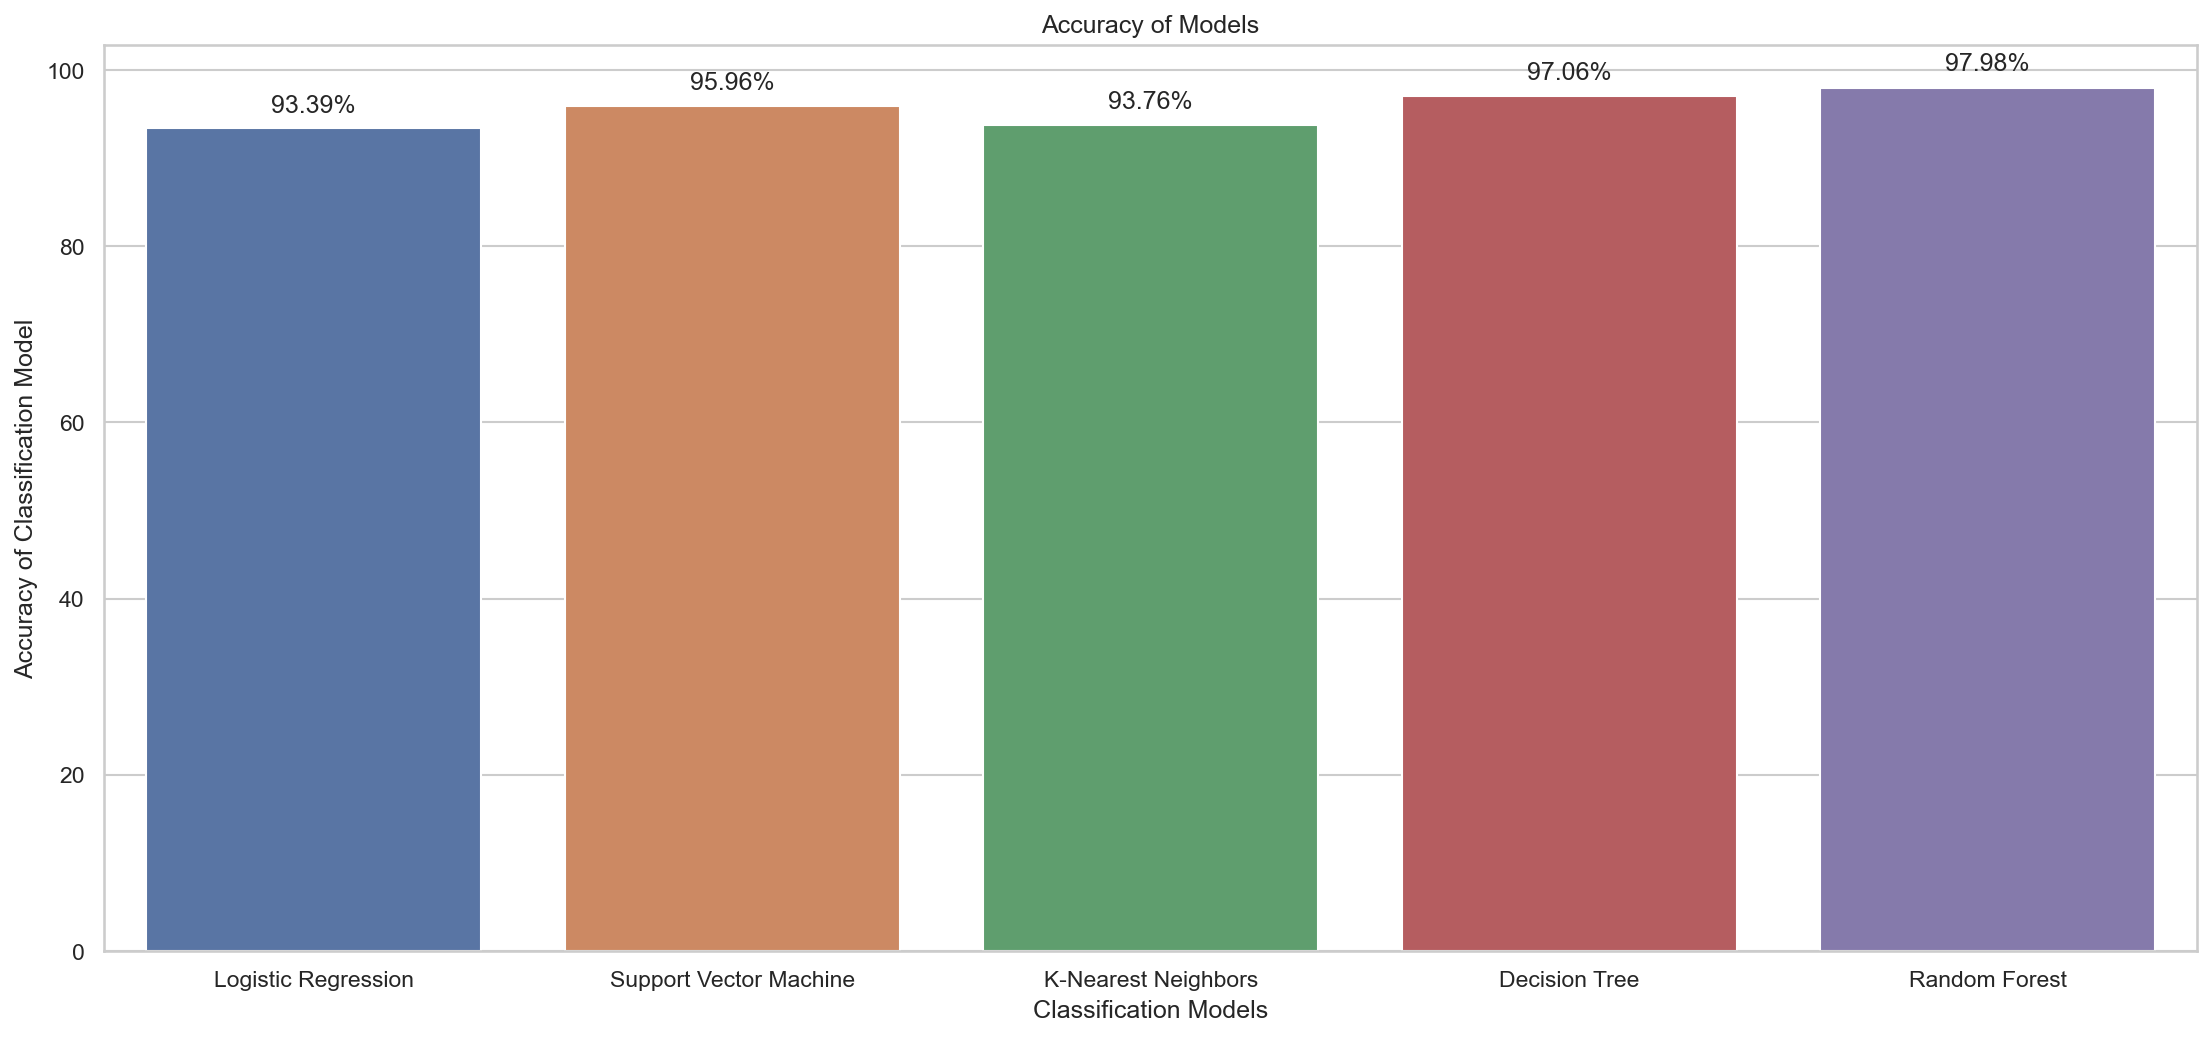

In [52]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(18,8), dpi=150)
ax = sns.barplot(x=algo, y=scores)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

# PREDICTION

In [53]:
import pickle
filename = 'phishingurl.pkl'
pickle.dump(rf,open(filename,'wb'))

In [54]:
model = open('phishingurl.pkl','rb')
forest = pickle.load(model)

In [55]:
y_pred = forest.predict(X_test)

In [56]:
X.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [57]:
n=list(map(int,input().split()))


1	1	0	0	1	-1	-1	-1	0	0	0	1	1	-1	1	-1	1	1	0	0	0	0	0	-1	1	-1	-1	0	1	1 


In [58]:
#1	1	0	0	1	-1	-1	-1	0	0	0	1	1	-1	1	-1	1	1	0	0	0	0	0	-1	1	-1	-1	0	1	1 phishing website
#0	0	1	0	0	-1	1	1	0	0	0	0	1	0	0	-1	0	0	0	1	0	1	0	-1	1	0	-1	0	1	0


In [60]:
prediction=forest.predict([n])
if(prediction==0):
    print("it is a legitimate url")
else:
    print("it is a PHISING WEBSITE")

it is a PHISING WEBSITE
